# Multimodal Clustering Analysis

Sep 2019  
Dongmin Kim
[underkoo@kaist.ac.kr](mailto:underkoo@kaist.ac.kr)

**Expected input data:**
Process 900 dim latent feature of multi-modal instagram posts

**What this script does:**  
Explorative data analysis on the mult-modal latent. Checks for feature correlation (features = 900 dimesnsions), applies and visualized PCA, applies t-SNE on different data (raw, PCA, etc).


In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import os
import copy
import collections
import seaborn as sns; sns.set()
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import Birch, SpectralClustering, AffinityPropagation, AgglomerativeClustering, MiniBatchKMeans, KMeans, DBSCAN, OPTICS
import matplotlib.colors as colors
import math
import time
import config

In [2]:
# magic line to have in-notebook interactive plots
%matplotlib notebook

In [3]:
#If you want to use a korean words, unblock it!
# path_gothic = './fonts/NanumBarunGothic.ttf'
# fontprop1 = fm.FontProperties(fname=path_gothic, size=3)

In [4]:
CONFIG = config.Config

## load latent feature

In [5]:
# load raw data
target_dataset = 'instagram0830'
df_data = pd.read_csv(os.path.join(CONFIG.CSV_PATH, 'normalized_' + target_dataset + '.csv'), index_col=0, header=None, encoding='utf-8-sig')
df_data.index.name = 'short_code'
print('complete csv shape: ' + str(df_data.shape))
print(df_data.iloc[:100])

complete csv shape: (97672, 900)
                  1         2         3         4         5         6    \
short_code                                                                
Bh9eo6zh3WM -0.027088 -0.027511 -0.088073 -0.008941  0.006235 -0.033718   
BoSvvEPhZMS -0.043966 -0.014369  0.034524 -0.026404  0.056025 -0.029490   
BgIh0ZjhI-d -0.045587 -0.081956 -0.012263  0.029601  0.021733  0.008299   
BhUIQpoF6gk  0.014557  0.001390 -0.052923 -0.030599 -0.016757  0.021832   
BnTl4IYg40P -0.020843 -0.050028  0.050271  0.033572 -0.036179  0.044618   
BoI9HCMhZQu -0.017949 -0.029578 -0.007835  0.016886  0.025985  0.009679   
BrKyWdQlwo8  0.002205 -0.031708 -0.012164  0.012792  0.011020 -0.004298   
BruQRNjn34Y  0.033121  0.052663  0.036795 -0.021258  0.023931 -0.010975   
Br2aY8rH2mA -0.026300 -0.020698 -0.007104  0.015959 -0.008512 -0.026031   
Bn_hS-NAq_Y  0.004280 -0.036571 -0.063733  0.004355  0.079198  0.065047   
Br69C_Qgk1T -0.046592  0.013034 -0.023838 -0.032923  0.039084 -0.00

In [ ]:
print(df_data.describe())

In [ ]:
# data seems to be well normalized to mean or median = 0 and std = 1
plt.figure()
df_data.boxplot()

In [ ]:
#df_normalized = df_data.div((np.sqrt(np.sum(np.square(df_data), axis=1))), axis=0)
#df_normalized.to_csv(os.path.join(CONFIG.CSV_PATH, 'normalized_' + target_dataset + '.csv'), header=None, encoding='utf-8-sig')

In [ ]:
#print(df_normalized.describe())

In [ ]:
# data seems to be well normalized to mean or median = 0 and std = 1
#plt.figure()
#df_normalized.boxplot()

## PCA as dimensionality reduction

In [32]:
# PCA
pca = PCA(n_components=200)
df_pca_data = pd.DataFrame(pca.fit_transform(df_data))
df_pca_data.columns = ['PC' + str(i) for i in range(df_pca_data.shape[1])]
df_pca_data.index = df_data.index
print('singular_values_:\n' + str(pca.singular_values_))
print('components_:\n' + str(pca.components_))

# create PCA transformation DF
df_pca_transformation = pd.DataFrame(pca.components_).transpose()
df_pca_transformation.columns = ['PC' + str(i) for i in range(1, pca.n_components_ + 1)]
df_pca_transformation.index = df_data.columns
#print(df_pca_transformation)

singular_values_:
[65.45085436 39.28083883 32.58430907 29.57455861 28.79107968 28.46161686
 28.01933255 27.04444697 26.76705829 26.10256149 25.4519568  25.12642826
 24.85204883 24.50435695 24.28266464 24.07460789 24.06618455 23.6575231
 23.37002128 23.2239145  23.15193298 22.93282735 22.67066915 22.29443292
 22.19361557 22.15988252 22.00996573 21.94848243 21.75813352 21.65746674
 21.56843433 21.49049091 21.38305291 21.17591902 21.0903919  21.01716278
 20.88625625 20.77279855 20.6769851  20.55568505 20.48452918 20.41373929
 20.34033447 20.2258422  20.0652656  19.98410945 19.91914145 19.77372708
 19.6752291  19.62537195 19.46983544 19.42873649 19.32900741 19.25458209
 19.09211647 19.05380285 18.99526406 18.94670677 18.80762461 18.76192731
 18.71980214 18.57829425 18.51884205 18.4049521  18.35978753 18.22581821
 18.17613179 18.11462169 18.04611692 18.02187758 17.89130316 17.8708707
 17.8329265  17.76753087 17.66131009 17.54795    17.52575242 17.4446934
 17.39786733 17.31308939 17.23107346

<IPython.core.display.Javascript object>


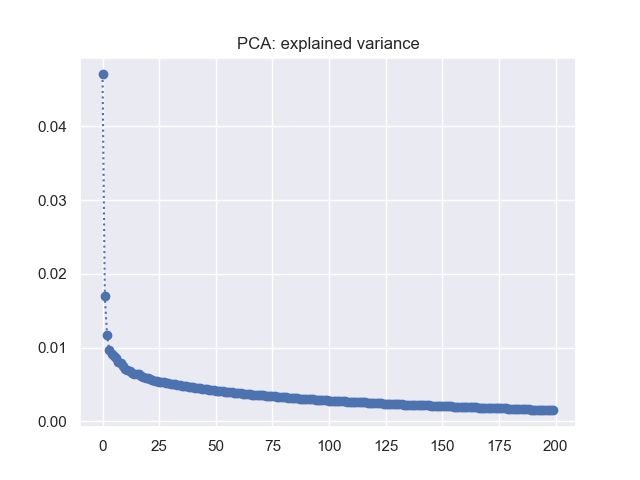

<IPython.core.display.Javascript object>


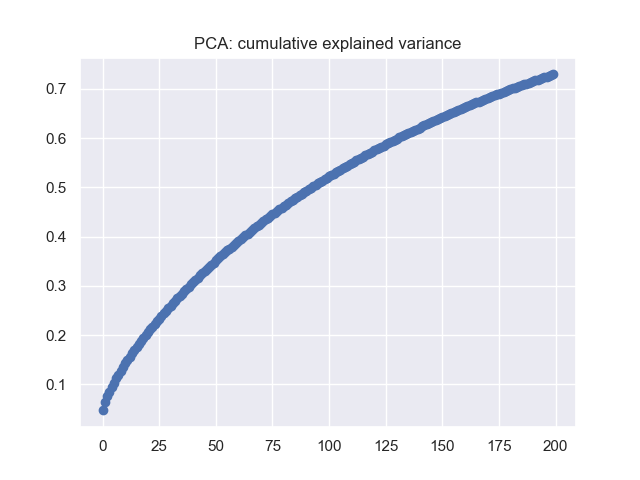

Text(0.5, 1.0, 'PCA: cumulative explained variance')

In [33]:
# PCA: plot variance explained
plt.figure()
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle=':')
plt.title('PCA: explained variance')

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle=':')
plt.title('PCA: cumulative explained variance')

In [11]:
def scatterplot_pointlabels(df_twocols, markersize=None):
    # basic scatterplot
    fig = plt.figure()
    plt.plot(df_twocols.iloc[:, 0], df_twocols.iloc[:, 1], marker='.', linestyle='None', markersize=markersize)

In [ ]:
# plot PC dimensions
for dimen1 in range(0, 5):
    for dimen2 in range(dimen1 + 1, 5):
        # subset dataframe to the PC columns we need
        df_tmp = df_pca_data.iloc[:, [dimen1, dimen2]]
        
        # plot without labels
        scatterplot_pointlabels(df_tmp)
        # plt.title(df_tmp.columns)
        plt.xlabel(df_tmp.columns[0])
        plt.ylabel(df_tmp.columns[1])
        
        # plot with labels
        #scatterplot_pointlabels(df_tmp)
        # plt.title(df_tmp.columns)
        #plt.xlabel(df_tmp.columns[0])
        #plt.ylabel(df_tmp.columns[1])

In [21]:
#df_pca_data.to_csv(os.path.join(CONFIG.CSV_PATH, 'pca_' + target_dataset + '.csv'), encoding='utf-8-sig')
df_pca_data = pd.read_csv(os.path.join(CONFIG.CSV_PATH, 'pca_' + target_dataset + '.csv'), index_col=0, header=0, encoding='utf-8-sig')
print(df_pca_data.iloc[:100])

                  PC0       PC1       PC2       PC3       PC4       PC5  \
short_code                                                                
Bh9eo6zh3WM -0.547172  0.398855 -0.058295  0.341862 -0.293207 -0.093024   
BoSvvEPhZMS -0.012246 -0.109486 -0.309823 -0.164997  0.670187  0.144331   
BgIh0ZjhI-d -0.685261 -0.067102  0.329985  0.183837 -0.227403  0.396076   
BhUIQpoF6gk -0.629787  0.585411 -0.149979  0.223492 -0.115864 -0.117141   
BnTl4IYg40P  0.142944 -0.124586 -0.025383 -0.521687  0.697096 -0.308290   
BoI9HCMhZQu  0.316890  1.060196 -0.680123 -0.054551 -0.094246 -0.504667   
BrKyWdQlwo8 -0.445487  0.409775 -0.295738  0.093333 -0.042342 -0.065916   
BruQRNjn34Y  0.743539  0.424563 -0.014466 -0.384749 -0.415517 -0.049956   
Br2aY8rH2mA  0.146126  0.664748  1.675172  0.359781  0.292078  0.709454   
Bn_hS-NAq_Y -0.049060 -0.142177 -0.105897 -0.570757  0.120289 -0.744074   
Br69C_Qgk1T  0.518611  0.379986 -0.464472 -0.093562 -0.582378  0.542907   
BsFudrehNdL -0.592956 -0.

## Downsample

In [7]:
def downsampling(df_data, num_samples=100):
#     idx = int(len(df_data)/num_samples)
#     idx_list = [x for x in range(0, len(df_data), idx)]
#     return df_data.iloc[idx_list]
    return df_data.sample(num_samples)

In [34]:
ds_data = downsampling(df_data, 10000)

In [24]:
#ds_data.to_csv(os.path.join(CONFIG.CSV_PATH, 'ds_' + target_dataset + '.csv'), header=None, encoding='utf-8-sig')
ds_data = pd.read_csv(os.path.join(CONFIG.CSV_PATH, 'ds_' + target_dataset + '.csv'), index_col=0, header=None, encoding='utf-8-sig')
ds_data.index.name = 'short_code'
print(ds_data)

                  1         2         3         4         5         6    \
short_code                                                                
BrqhPR1A6gS -0.028837 -0.000783  0.006540  0.005128 -0.092047  0.014714   
BrUZ8KlgxgL  0.031938 -0.031732 -0.008419  0.021557 -0.029076  0.024119   
Bf4kiVIH1Vo  0.031282  0.005056 -0.007381  0.028750  0.041974  0.009927   
Bw8MA6vFu9c  0.005289 -0.013774  0.007695 -0.075995 -0.014484 -0.006274   
BoEXPnDgI0s  0.028203  0.010067 -0.053526 -0.030746  0.000781 -0.010246   
Bsjy6JzFC6a  0.039359 -0.039820  0.004666  0.013789 -0.045221 -0.017302   
ByKvZ5blb-u  0.020383  0.004749  0.036965  0.065116 -0.012485  0.019379   
BgAYegkg_ZY -0.058513 -0.046783 -0.027278 -0.026578 -0.030327 -0.014677   
BtDcA8qBQ6p -0.004288 -0.034781 -0.019764  0.011893  0.030211 -0.018445   
BmBNF5dgjpn  0.027354 -0.066675 -0.080028 -0.023788  0.051860  0.042439   
ByUmf-rFdum -0.045699  0.017842  0.025781 -0.064160  0.041146 -0.036740   
Bo7kv5JF9lB -0.002036  0.

## t-SNE

In [54]:
def do_tsne(tsne_object, data_to_pass):
    data_tsne = pd.DataFrame(tsne_object.fit_transform(data_to_pass))
    data_tsne.index = data_to_pass.index
    data_tsne.columns = [['tsne1', 'tsne2']]
    return data_tsne

In [ ]:
# on pca
# TODO tune the learning rate and the iterations (rest should be ok i guess)
start_time = time.time()
#tsne_pca = do_tsne(TSNE(n_components=2, perplexity=50, early_exaggeration=12.0, learning_rate=100, n_iter=5000, random_state=42, verbose=1), df_pca_data)
tsne_pca = do_tsne(MulticoreTSNE(n_components=2, perplexity=5000, learning_rate=200, n_iter=1000, random_state=42, n_jobs=4, verbose=1), df_data)
print("time elapsed: " + str(time.time()-start_time))

In [ ]:
# plot t-SNE with PCA
scatterplot_pointlabels(tsne_pca, 0.2)
plt.title('t-SNE on PCA data')
plt.savefig(os.path.join(CONFIG.SVG_PATH, 'tsne_pca_' + target_dataset + '.svg'))


In [25]:
#tsne_pca.to_csv(os.path.join(CONFIG.CSV_PATH, 'tsne_' + target_dataset + '.csv'), encoding='utf-8-sig')
tsne_pca = pd.read_csv(os.path.join(CONFIG.CSV_PATH, 'tsne_' + target_dataset + '.csv'), index_col=0, header=0, encoding='utf-8-sig')
print(tsne_pca.iloc[:100])

                tsne1     tsne2
short_code                     
Bh9eo6zh3WM -0.460810  0.294711
BoSvvEPhZMS -0.318645  1.979027
BgIh0ZjhI-d  1.181634  0.115340
BhUIQpoF6gk -0.968664 -1.200871
BnTl4IYg40P -0.901584  0.737259
BoI9HCMhZQu -0.898039  1.432321
BrKyWdQlwo8 -0.195691 -1.365409
BruQRNjn34Y  0.244602  1.399499
Br2aY8rH2mA  0.119546  1.427601
Bn_hS-NAq_Y  0.448414 -1.521242
Br69C_Qgk1T -0.566340 -0.419409
BsFudrehNdL -0.598429 -1.209803
BlMgEb1AxuD -0.494893 -1.077209
BnTf4-wgGvu -0.338809 -1.281664
Bgx1HkjFoq_ -0.781186  0.636783
BhUnpHaDp-c -0.143888 -1.023534
BnyNSN0H5EM -0.603780 -0.049622
BoG5pQpHD92  0.499378  1.202751
BlK0wY_HAn8 -0.358824 -1.504700
Bnn9mSzFqrv -0.842822 -0.681284
BntC-EtF0mX -0.216549 -0.066913
BjPN_94AT_v  0.933068 -1.380955
BjSC2lEn7NH -0.071420  0.260925
BjjtqV6Aqic -0.503611  0.559144
BxZ20ODAh9u  1.039202 -0.210514
Bx8yyX2jgTC  0.897663  0.122515
Byxy79dhATV -0.535526 -0.051226
ByNtIv1jl5A -0.485205  0.151584
Bxc5LFOHGiI -0.833142  0.129946
BxM6YLfF

In [ ]:
# on raw data
# TODO tune the learning rate and the iterations (rest should be ok i guess)
# start_time = time.time()
# tsne_raw = do_tsne(MulticoreTSNE(n_components=2, perplexity=400, early_exaggeration=12.0, learning_rate=100, n_iter=10000, random_state=42, n_jobs=4), data)
# print("time elapsed: " + str(time.time()-start_time))

In [ ]:
# plot t-SNE with raw data
# scatterplot_pointlabels(tsne_raw, plot_labels=False)
# plt.title('t-SNE on raw data')
# scatterplot_pointlabels(tsne_raw)
# plt.title('t-SNE on raw data')

## Spectral Clustering

In [ ]:
def clustering_score(X, max_num_clusters=10):
    sse = []
    sil = []
    for k in range(2, max_num_clusters + 1):
        start_time = time.time()
        temp_clustering = KMeans(n_clusters = k, random_state=42).fit(X)
        labels = temp_clustering.labels_
        sse.append(temp_clustering.inertia_)
        sil.append(silhouette_score(X, labels, metric = 'cosine'))
        print("time elapsed: " + str(time.time()-start_time))
    return sse, sil

In [ ]:
def sse_distance(sse):
    distance = []
    last = len(sse) - 1
    for i in range(1, last):
        _distance = abs((sse[last] - sse[0]) * i - (last - 0) * sse[i] + last * sse[0] - sse[last] * 0) / math.sqrt(math.pow((sse[last] - sse[0]),2) + math.pow((last - 0),2))
        distance.append(_distance)
    return distance

In [ ]:
max_num_clusters = 30
sse, sil = clustering_score(df_data, max_num_clusters)
fig = plt.figure()
plt.plot(range(2, max_num_clusters + 1), sse, marker='o')
plt.xlabel('num of clusters')
plt.ylabel('SSE')
distance = sse_distance(sse)
fig = plt.figure()
plt.plot(range(3, max_num_clusters), distance, marker='o')
plt.xlabel('num of clusters')
plt.ylabel('SSE-distance')
fig = plt.figure()
plt.plot(range(2, max_num_clusters + 1), sil, marker='o')
plt.xlabel('num of clusters')
plt.ylabel('SIL')

In [17]:
num_clusters = 21

In [18]:
#labeling points of tnse clusters
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']), fontsize=3, fontproperties=fontprop1)

In [19]:
def count_percentage(cluster_labels):
    count = collections.Counter(cluster_labels)
    for k in count:
        print("cluster {} : {:.2%}".format(str(k), count[k]/len(cluster_labels)))

In [50]:
def do_clustering(df, tsne):
        start_time = time.time()
        #clustering = Birch(n_clusters=21).fit(df_data)
        #clustering = DBSCAN(eps=3, min_samples=5).fit(tsne_pca)
        #clustering = SpectralClustering(n_clusters=num_clusters, random_state=42).fit(df)
        #clustering = AgglomerativeClustering(n_clusters=num_clusters).fit(data.loc[filtered_columns.index,:])# data, df_pca_data
        clustering = KMeans(n_clusters=num_clusters).fit(df)# data, df_pca_data
        count_percentage(clustering.labels_)
        print(clustering.labels_)
        print("time elapsed: " + str(time.time()-start_time))
        dist = copy.deepcopy(tsne)
        dist = dist.loc[df.index]
        dist['cluster'] = clustering.labels_
        return dist

In [51]:
#Spectral clustering
#For using 'amg' you should install pyamg in you local computer.
# Check the component at
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
clustered_df = do_clustering(tsne_pca, tsne_pca)

cluster 1 : 6.82%
cluster 16 : 2.47%
cluster 2 : 5.54%
cluster 5 : 5.02%
cluster 11 : 7.39%
cluster 9 : 4.29%
cluster 8 : 8.02%
cluster 4 : 6.04%
cluster 12 : 6.27%
cluster 6 : 6.80%
cluster 13 : 5.52%
cluster 20 : 5.20%
cluster 15 : 6.09%
cluster 19 : 6.38%
cluster 17 : 2.50%
cluster 7 : 3.52%
cluster 0 : 2.31%
cluster 3 : 3.45%
cluster 14 : 1.65%
cluster 10 : 3.06%
cluster 18 : 1.66%
[ 1 16  2 ... 15 20 13]
time elapsed: 42.68404936790466


In [27]:
clustered_df = pd.read_csv(os.path.join(CONFIG.CSV_PATH, 'clustered_birch_' + target_dataset + '.csv'), index_col=0, header=0, encoding='utf-8-sig')
print(clustered_df.iloc[:100])

                tsne1     tsne2  cluster
short_code                              
Bh9eo6zh3WM -0.460810  0.294711        8
BoSvvEPhZMS -0.318645  1.979027        0
BgIh0ZjhI-d  1.181634  0.115340       16
BhUIQpoF6gk -0.968664 -1.200871       11
BnTl4IYg40P -0.901584  0.737259        5
BoI9HCMhZQu -0.898039  1.432321        5
BrKyWdQlwo8 -0.195691 -1.365409        0
BruQRNjn34Y  0.244602  1.399499        6
Br2aY8rH2mA  0.119546  1.427601       17
Bn_hS-NAq_Y  0.448414 -1.521242        1
Br69C_Qgk1T -0.566340 -0.419409        2
BsFudrehNdL -0.598429 -1.209803        0
BlMgEb1AxuD -0.494893 -1.077209        5
BnTf4-wgGvu -0.338809 -1.281664       18
Bgx1HkjFoq_ -0.781186  0.636783       10
BhUnpHaDp-c -0.143888 -1.023534        6
BnyNSN0H5EM -0.603780 -0.049622        6
BoG5pQpHD92  0.499378  1.202751        6
BlK0wY_HAn8 -0.358824 -1.504700        5
Bnn9mSzFqrv -0.842822 -0.681284        8
BntC-EtF0mX -0.216549 -0.066913        5
BjPN_94AT_v  0.933068 -1.380955        2
BjSC2lEn7NH -0.0

In [28]:
def plot_spectral_clustering(dataframe, markersize=None):
    # plot spectrac clustering result
    # without label
    #scatterplot_pointlabels(dataframe[['x', 'y']], markersize)
    # better colors
    plt.figure(figsize=(13.2,9.6))
    color_dict = {v: k for v, k in enumerate(sns.color_palette("Paired", num_clusters))}
    sns_plot = sns.scatterplot(x="x", y="y", hue='cluster_id', palette=color_dict, data=dataframe, marker='.', s=markersize)
    plt.savefig(os.path.join(CONFIG.SVG_PATH, 'clustering_' + target_dataset + '.svg'))

<IPython.core.display.Javascript object>


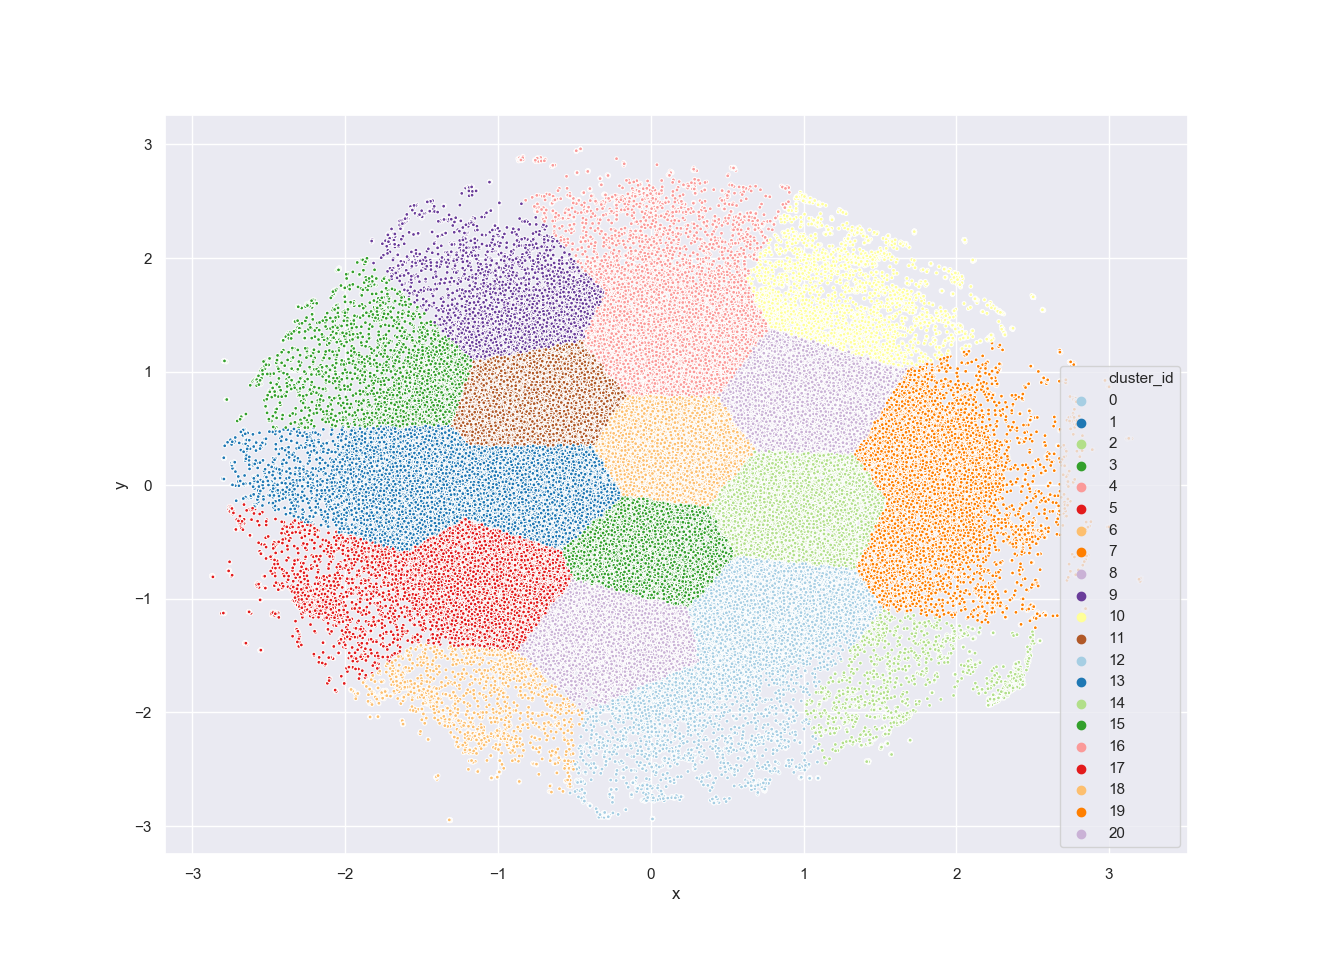

In [52]:
# put clustering info into df
df_clustered_spectral = pd.DataFrame({'x': clustered_df.tsne1.squeeze(), 
                                      'y': clustered_df.tsne2.squeeze(), 
                                      'cluster_id': clustered_df.cluster.squeeze()})
# debug prints
#print(df_clustered_spectral.dtypes)
plot_spectral_clustering(df_clustered_spectral, 30)       
#ds_clustered_spectral = downsampling(df_clustered_spectral, 5000)
#plot_spectral_clustering(ds_clustered_spectral, 0.2)       
# print(df_clustered_spectral.iloc[:10, :])
# df_clustered_spectral['cluster_id'].describe() # 30 integer clusters